Customer Segmentation Project

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# Part 1: Load Data
# Snippet: Load the data from the provided Excel file
df = pd.read_excel("C:\\Users\\msodeeq\\Downloads\\Online Retail.xlsx")

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Part 2: Data Cleaning
# Snippet: Clean the data by removing rows with missing or invalid values
df = df.dropna(subset=['CustomerID'])  # Remove rows with missing CustomerID
df = df[df['Quantity'] > 0]  # Remove rows where Quantity is zero or negative
df = df[df['UnitPrice'] > 0]  # Remove rows where UnitPrice is zero or negative

In [7]:
# Part 3: Data Preparation - Creating RFM (Recency, Frequency, Monetary) Metrics
# Snippet: Create RFM metrics for customer segmentation
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
current_date = df['InvoiceDate'].max() + datetime.timedelta(days=1)

In [10]:
# Part 3: Data Preparation - Creating RFM (Recency, Frequency, Monetary) Metrics
# Snippet: Create RFM metrics for customer segmentation
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']  # Create TotalPrice column for Monetary value
current_date = df['InvoiceDate'].max() + datetime.timedelta(days=1)

rfm_table = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (current_date - date.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': lambda price: np.sum(price),  # Monetary
}).reset_index()

rfm_table.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)


In [11]:
# Part 4: Feature Scaling
# Snippet: Scale the RFM features for clustering
scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm_table[['Recency', 'Frequency', 'Monetary']])

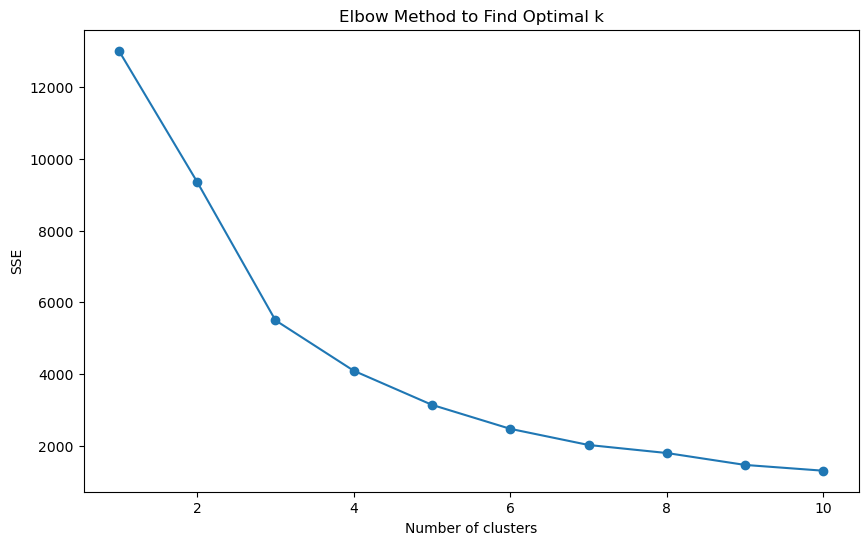

In [12]:
# Part 5: Finding Optimal Number of Clusters (Elbow Method)
# Snippet: Use the elbow method to determine the optimal number of clusters
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_rfm)
    sse.append(kmeans.inertia_)

# Plotting the SSE to find the Elbow Point
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method to Find Optimal k')
plt.show()

In [13]:
# Part 6: Applying KMeans Clustering
# Snippet: Apply KMeans clustering to segment the customers
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_rfm)
rfm_table['Cluster'] = kmeans.labels_

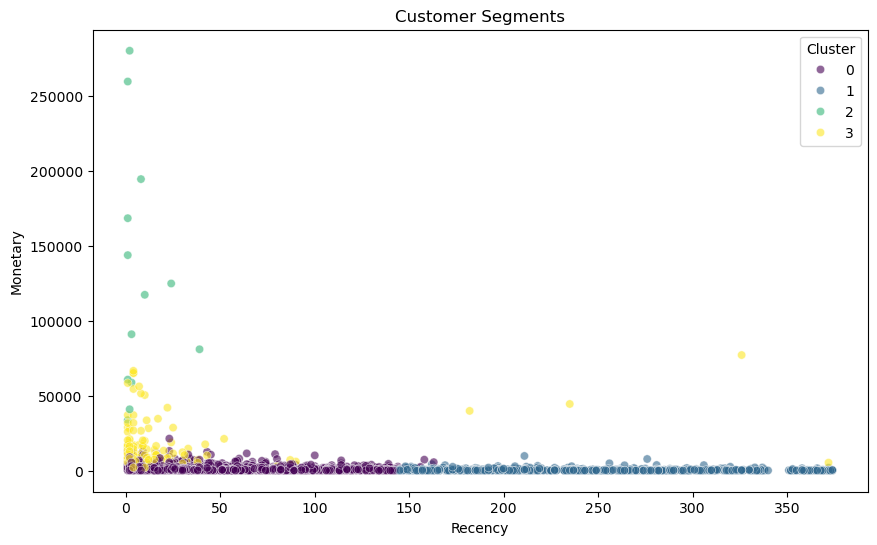

In [14]:
# Part 7: Visualization of Clusters
# Snippet: Visualize the customer segments using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_table, x='Recency', y='Monetary', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Customer Segments')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

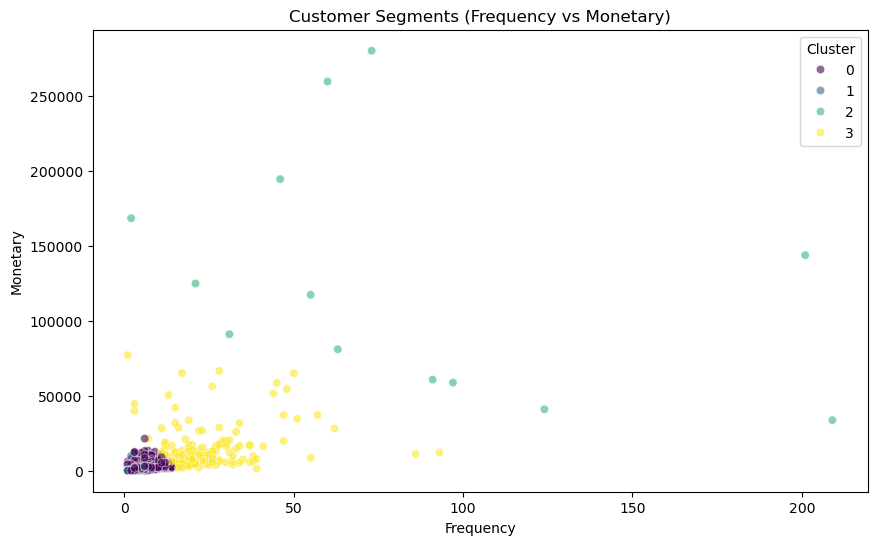

In [16]:
# Visualize Frequency vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_table, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Customer Segments (Frequency vs Monetary)')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

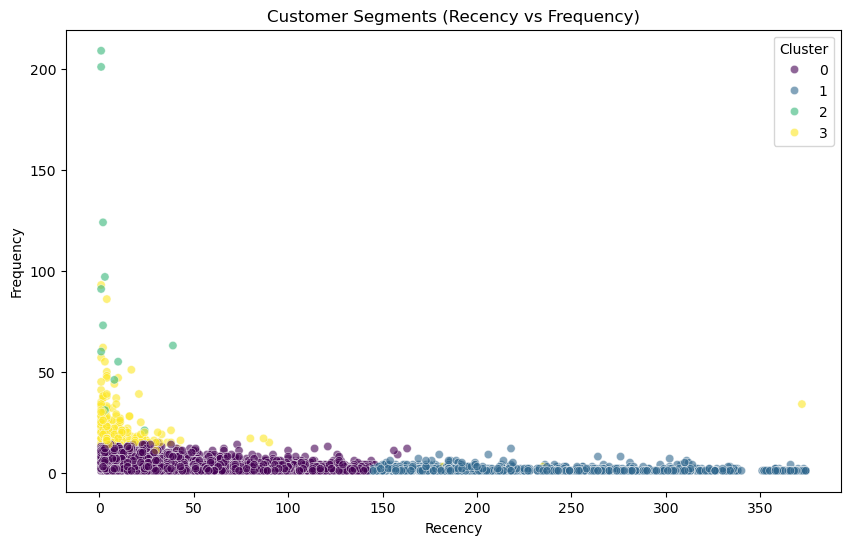

In [17]:
# Visualize Recency vs Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_table, x='Recency', y='Frequency', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Customer Segments (Recency vs Frequency)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Part 8: Save the Result to CSV
# Snippet: Save the customer segmentation results to a CSV file
rfm_table.to_csv('customer_segmentation_results.csv', index=False)

print("Customer segmentation completed successfully! Results saved to customer_segmentation_results.csv.")

Customer segmentation completed successfully! Results saved to customer_segmentation_results.csv.


In [19]:
rfm_table.to_csv('C:\\Users\\msodeeq\\Downloads\\customer_segmentation_results.csv', index=False)

Data  source: https://archive.ics.uci.edu/dataset/352/online+retail